In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.avragg as avragg
import mlgrad.loss as loss
import mlgrad.regr as regr

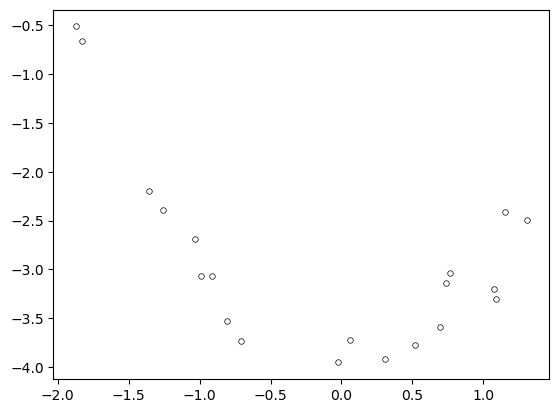

In [185]:
N = 20
X0 = 4*np.random.random(N)-2
Y0 = (X0 - 2) * (X0 + 2) 
Y1 = Y0 + 1*np.random.random(N)-0.5
X1 = X0
X1s = X1.reshape(-1,1)

XR = np.linspace(-2,2,100)

def polynomial(params, X):
    m = len(params)
    Y = np.zeros_like(X, 'd')
    for j in range(m):
        Y += params[j] * (X ** j)
    return Y

def eval_u(X, m):
    Ys = []
    for j in range(m+1):
        Ys.append(X ** j)
    return np.c_[tuple(Ys)]

params = np.array([-4, 0, 1], 'd')
linmod = models.LinearModel(params)
Y0 = polynomial(params, X0)
plt.scatter(X1, Y1, c='w', edgecolors='k', s=16, linewidth=0.5)
plt.show()

In [199]:
n_features = 2
U0 = eval_u(X0, n_features)
U1 = eval_u(X1, n_features)

In [200]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score

[-3.940 -0.046  0.937]


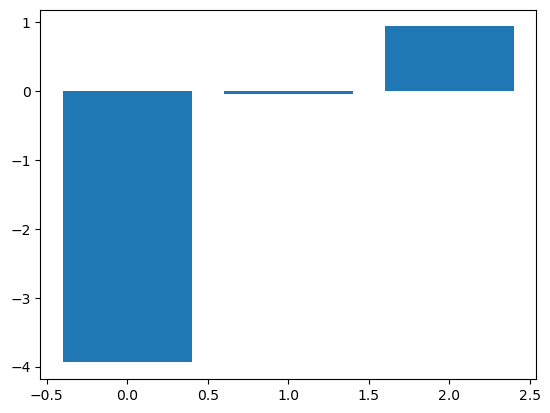

OLS r^2: 0.947


In [201]:
ols = LinearRegression(fit_intercept=False)
ols.fit(U1, Y1)
print(ols.coef_)

plt.bar(range(n_features+1), ols.coef_)
plt.show()

Y_p = ols.predict(U1)
r2_ols = r2_score(Y1, Y_p)
print(f"OLS r^2: {r2_ols:.3f}")

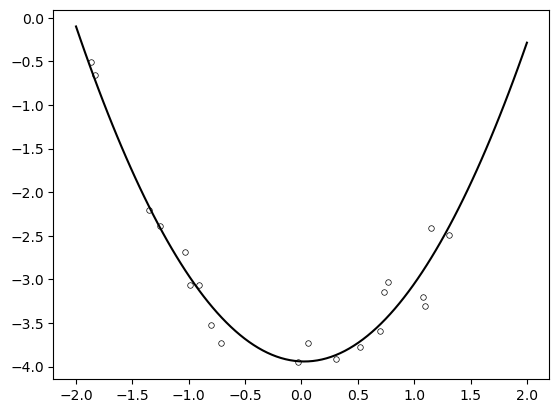

In [202]:
plt.scatter(X1, Y1, c='w', edgecolors='k', s=16, linewidth=0.5)
plt.plot(XR, ols.predict(eval_u(XR, n_features)), color='k')
plt.show()

[-3.915 -0.050  0.920]


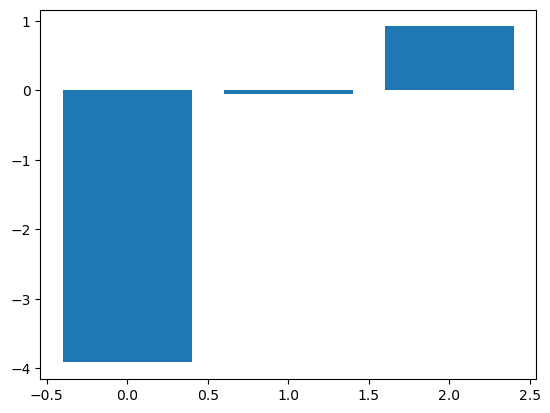

Lasso r^2: 0.947


In [203]:
lasso = Lasso(alpha=0.005, tol=0.001, max_iter=5000, fit_intercept=False)
lasso.fit(U1, Y1)

print(lasso.coef_)

plt.bar(range(n_features+1), lasso.coef_)
plt.show()
n_features
Y_p = lasso.predict(U1)
r2_lasso = r2_score(Y1, Y_p)
print(f"Lasso r^2: {r2_lasso:.3f}")

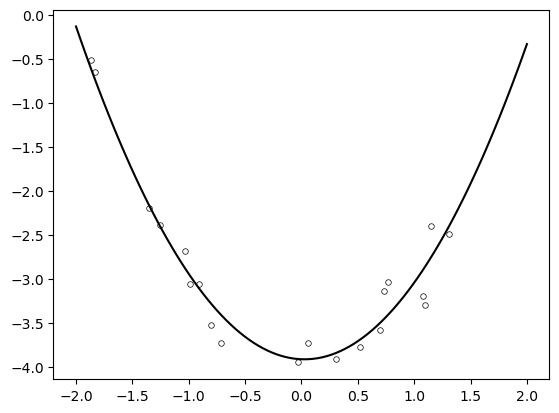

In [204]:
plt.scatter(X1, Y1, c='w', edgecolors='k', s=16, linewidth=0.5)
plt.plot(XR, lasso.predict(eval_u(XR, n_features)), color='k')
plt.show()

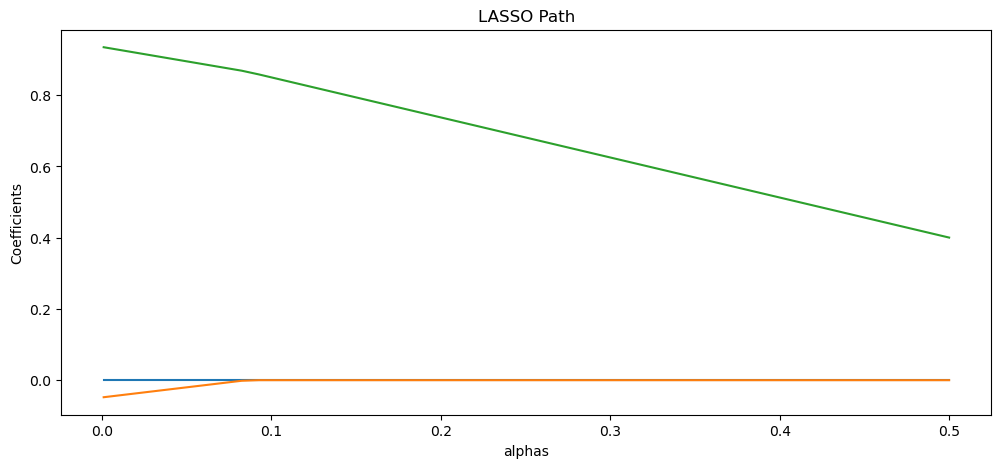

In [205]:
coef_path = []
alphas = np.linspace(0.001, 0.5, 50)
for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.01, max_iter=5000)
    lasso.fit(U1, Y1)
    coef_path.append(lasso.coef_)

coef_path = np.c_[tuple(coef_path)]

plt.figure(figsize=(12,5))
for j in range(n_features+1):
    plt.plot(alphas, coef_path[j,:])
plt.xlabel("alphas")
plt.ylabel("Coefficients")
plt.title("LASSO Path")

plt.show()